# Online Shoppers Intention

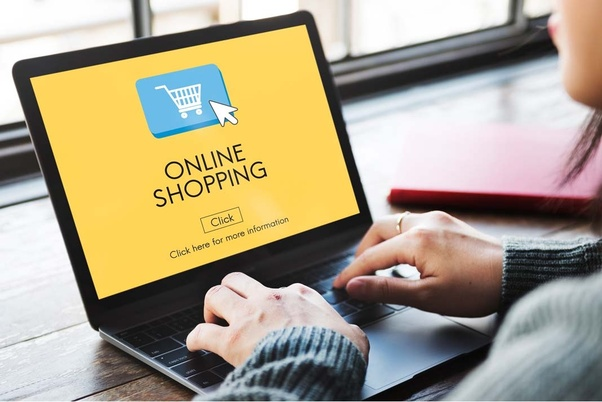

## Problem Definition

Increase in the adoption and penetration of Internet has turned the online marketplace into an important distribution channel where consumers and businesses interact with each other. But the fact that the conversion rates have not increased at the same rate leads to the needs for solutions. We will analyze the different features like time duration in pages, bounce/exit rates, page value etc and predict whether they are making transaction or not.


## Data

The dataset was downloaded from UCI repository. This data was taken from a leading distribution company in Turkey.

## Features

* Administrative: Number of pages visited by the visitor about account management
* Administrative duration: Total amount of time (in seconds) spent by the visitor on account management related pages
* Informational: Number of pages visited by the visitor about Web site, communication and address information of the shopping site
* Informational duration: Total amount of time (in seconds) spent by the visitor on informational pages
* Product related: Number of pages visited by visitor about product related pages
* Product related duration: Total amount of time (in seconds) spent by the visitor on product related pages

The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

* Bounce rate: Average bounce rate value of the pages visited by the visitor
* Exit rate: Average exit rate value of the pages visited by the visitor
* Page value: Average page value of the pages visited by the visitor

The metrics measured by "Google Analytics" for each page in the e-commerce site.

* Special Day: The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Libraries

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency,ttest_ind
from statsmodels.stats.proportion import proportions_ztest

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import classification_report,plot_roc_curve

from sklearn.ensemble import AdaBoostClassifier

C:\Users\Prinu Elsa Roy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Prinu Elsa Roy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Prinu Elsa Roy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 

## Loading Dataset

In [2]:
os.chdir('../Data')

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Info about Dataset

In [4]:
print('Rows:{}'.format(df.shape[0]))
print('Columns:{}'.format(df.shape[1]))

Rows:12330
Columns:18


Here 'Revenue' is the dependent variable. Since it is having boolean output, the problem is binary classification

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Only month and visitor type are object datatype

Here even though operating sysytems,browser,region and traffic type is having integer data type, they represents different categories

In [6]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

No missing values

In [7]:
num = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

In [8]:
df[num].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


## Exploratory Data Analysis

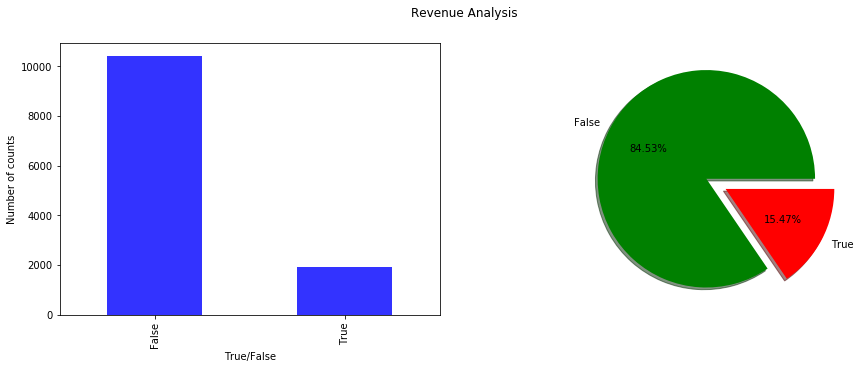

In [9]:
# Distribution of customers on Revenue
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df['Revenue'].value_counts().plot(kind='bar',color='blue',alpha=0.8)
#plt.title('Revenue Analysis')
plt.xlabel('True/False')
plt.ylabel('Number of counts');

plt.subplot(1,2,2)
size = df['Revenue'].value_counts().values
labels = df['Revenue'].value_counts().index
colors = ['green', 'red']
explode = [0, 0.2]
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%',)
plt.suptitle('Revenue Analysis');

It's clear that the dataset is highly imbalanced dataset. We should do some sampling techniques to avoid this problem.

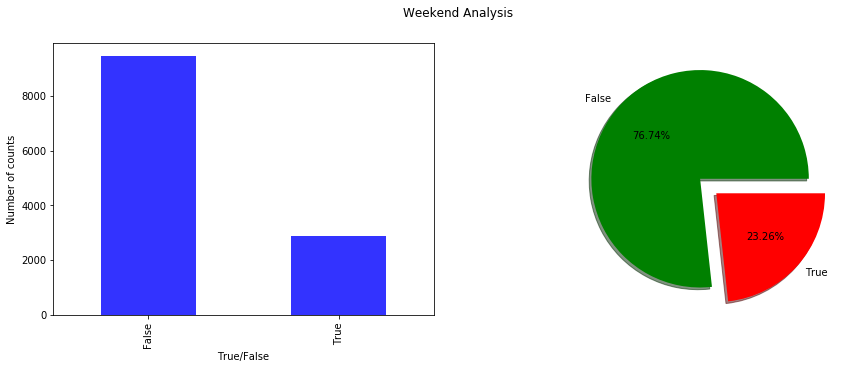

In [10]:
# Distribution of customers on Weekends
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df['Weekend'].value_counts().plot(kind='bar',color='blue',alpha=0.8)
#plt.title('Weekend Analysis')
plt.xlabel('True/False')
plt.ylabel('Number of counts');

plt.subplot(1,2,2)
size = df['Weekend'].value_counts().values
labels = df['Weekend'].value_counts().index
colors = ['green', 'red']
explode = [0, 0.2]
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%',)
plt.suptitle('Weekend Analysis');

Most of the people are visiting website during week days. Should provide some offers on weekends.

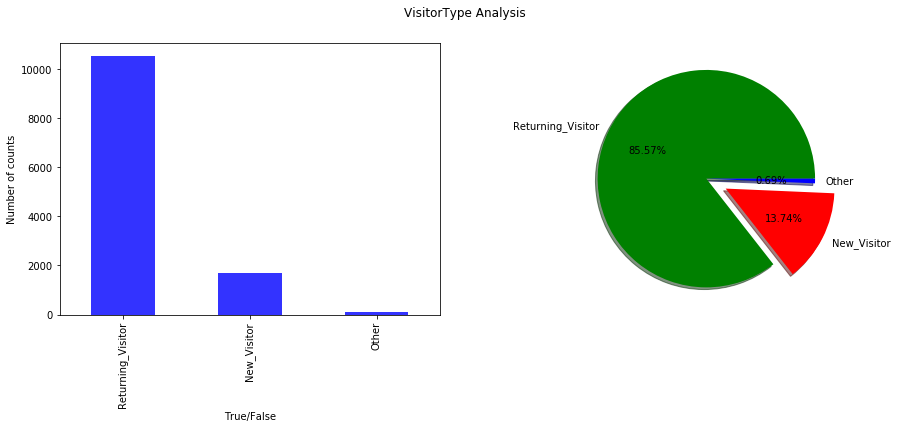

In [11]:
# Distribution of customers based on VisitorType
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df['VisitorType'].value_counts().plot(kind='bar',color='blue',alpha=0.8)
#plt.title('Weekend Analysis')
plt.xlabel('True/False')
plt.ylabel('Number of counts');

plt.subplot(1,2,2)
size = df['VisitorType'].value_counts().values
labels = df['VisitorType'].value_counts().index
colors = ['green','red','blue']
explode = [0,0.2,0]
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%',)
plt.suptitle('VisitorType Analysis');

Only 14% are new visitors. So new strategy should be developed to attract new customers

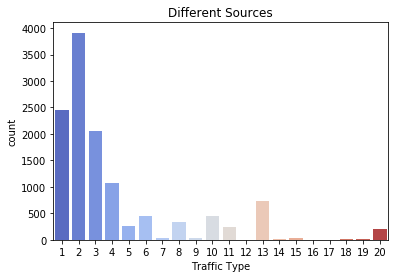

In [12]:
# Distribution of customers based on Traffic Type
sns.countplot(df['TrafficType'],palette='coolwarm')
plt.title('Different Sources')
plt.xlabel('Traffic Type')
plt.ylabel('count');

Traffic Source 2 is the best advertising source for the website. Should consider other sources and decide whether it is needed or not

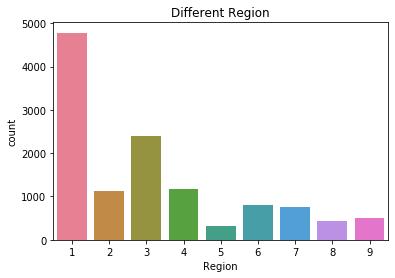

In [13]:
# Distribution of customers based on Region
sns.countplot(df['Region'],palette='husl')
plt.title('Different Region')
plt.xlabel('Region')
plt.ylabel('count');

The website is common among region 1 customers. Should give promotions in other regions to improve sales

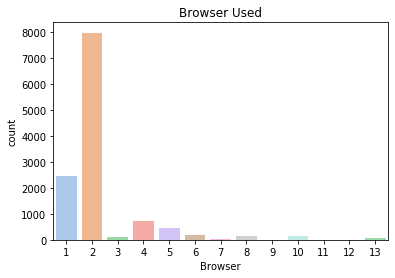

In [14]:
#Distribution of customers based on Browser
sns.countplot(df['Browser'],palette='pastel')
plt.title('Browser Used')
plt.xlabel('Browser')
plt.ylabel('count');

Browser 2 is commonly used

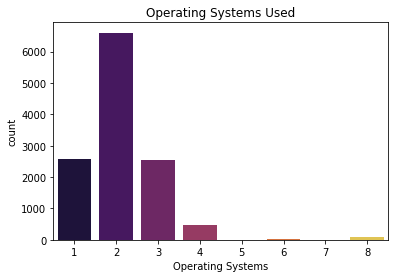

In [15]:
#Distribution of customers based on Operating Systems
sns.countplot(df['OperatingSystems'],palette='inferno')
plt.title('Operating Systems Used')
plt.xlabel('Operating Systems')
plt.ylabel('count');

Operating System 2 is commonly used

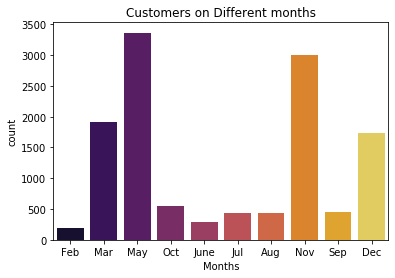

In [16]:
#Distribution of customers on Months
sns.countplot(df['Month'],palette='inferno')
plt.title('Customers on Different months')
plt.xlabel('Months')
plt.ylabel('count')
plt.show()

10 months are considered here, (exception January and April). In this May is the month, where the website is more commonly used.November,March and December are also considerable
One of the top Turkish Traditional Festival (Ahirkapi Hidirellez Festival) is happening in May. Also national youth and sports day is celebrated in May.

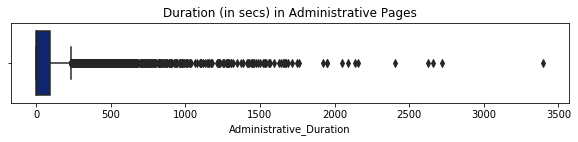

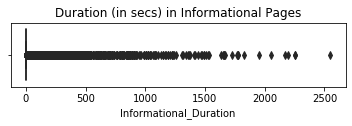

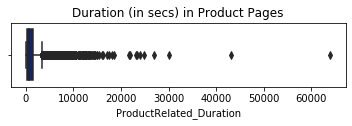

In [17]:
# Analysis on duration spent in different pages
plt.figure(figsize=(10,5))

plt.subplot(3,1,1)
sns.boxplot(df['Administrative_Duration'],palette='dark')
plt.title('Duration (in secs) in Administrative Pages')
plt.show()

plt.subplot(3,1,2)
sns.boxplot(df['Informational_Duration'],palette='dark')
plt.title('Duration (in secs) in Informational Pages')
plt.show()

plt.subplot(3,1,3)
sns.boxplot(df['ProductRelated_Duration'],palette='dark')
plt.title('Duration (in secs) in Product Pages')
plt.show()

Highly right skewed data. Outliers are present in the time spent. But we can't do any transformations, since this can happen in real time

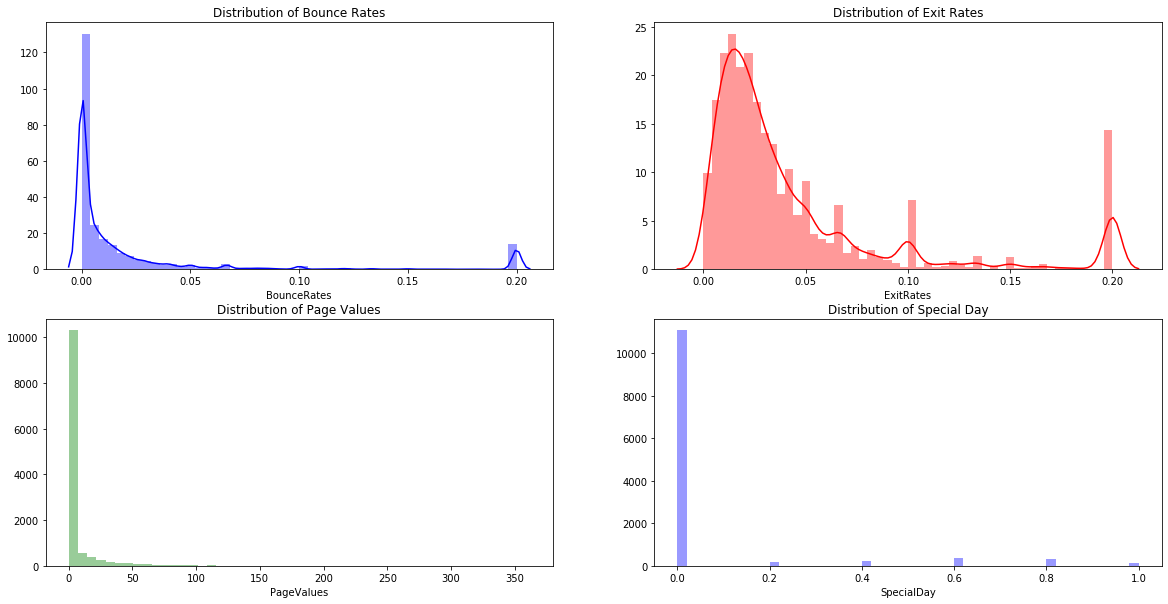

In [18]:
# Analysis on various factors like bounce rates,exit rates etc
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(df['BounceRates'],color='blue')
plt.title('Distribution of Bounce Rates');

plt.subplot(2,2,2)
sns.distplot(df['ExitRates'],color='red')
plt.title('Distribution of Exit Rates');

plt.subplot(2,2,3)
sns.distplot(df['PageValues'],color='green',kde=False)
plt.title('Distribution of Page Values');

plt.subplot(2,2,4)
sns.distplot(df['SpecialDay'],color='blue',kde=False)
plt.title('Distribution of Special Day');

As expected, since transactions are less, page values will be less. Also when considering bounce rates, most frequent value is 0. So, that means customers are visiting website, checking through different pages but revert back due to different reasons.

### Analysis wrt dependent variable

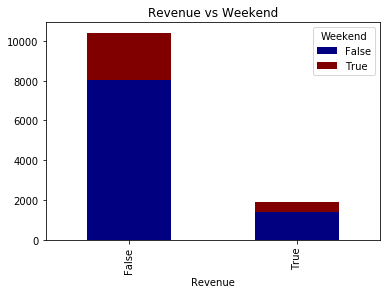

In [19]:
ct = pd.crosstab(df['Revenue'],df['Weekend'])
ct.plot(kind='bar',stacked=True,colormap='jet')
plt.title('Revenue vs Weekend');

In [20]:
ct = pd.crosstab(df['Revenue'],df['Weekend'])
ct

Weekend,False,True
Revenue,,
False,8053,2369
True,1409,499


In [21]:
print('{:.2f}% making transactions during weekends'.format((499/2868)*100))
print('{:.2f}% making transactions during week days'.format((1409/9462)*100))

17.40% making transactions during weekends
14.89% making transactions during week days


There is not a significant difference in transactions rates on weekdays and weekends. 75% of the customers are visiting websites on weekdays,but transaction rate is very low

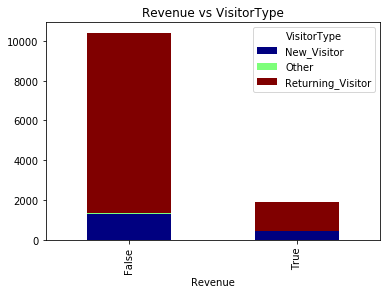

In [22]:
ct = pd.crosstab(df['Revenue'],df['VisitorType'])
ct.plot(kind='bar',stacked=True,colormap='jet')
plt.title('Revenue vs VisitorType');

In [23]:
ct = pd.crosstab(df['Revenue'],df['VisitorType'])
ct

VisitorType,New_Visitor,Other,Returning_Visitor
Revenue,,,
False,1272,69,9081
True,422,16,1470


In [24]:
print('{:.2f}% of new visitors are making transactions'.format((422/1694)*100))
print('{:.2f}% of returning visitors are making transactions'.format((1470/10551)*100))

24.91% of new visitors are making transactions
13.93% of returning visitors are making transactions


Here, the transaction rate of new visitors are almost doubled that of returning visitor

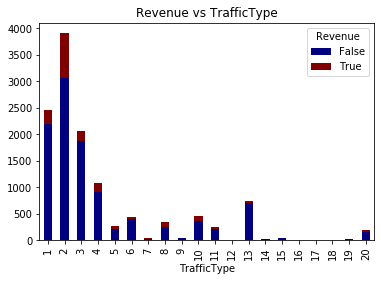

In [25]:
ct=pd.crosstab(df['TrafficType'],df['Revenue'])
ct.plot(kind='bar',stacked=True,colormap='jet')
plt.title('Revenue vs TrafficType');

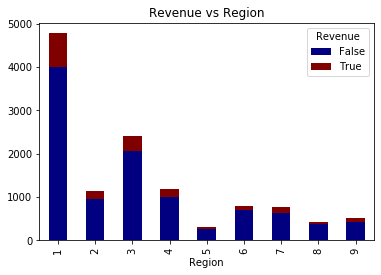

In [26]:
ct=pd.crosstab(df['Region'],df['Revenue'])
ct.plot(kind='bar',stacked=True,colormap='jet')
plt.title('Revenue vs Region');

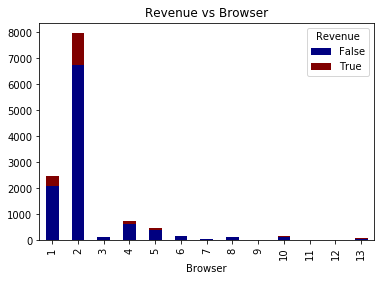

In [27]:
ct=pd.crosstab(df['Browser'],df['Revenue'])
ct.plot(kind='bar',stacked=True,colormap='jet')
plt.title('Revenue vs Browser');

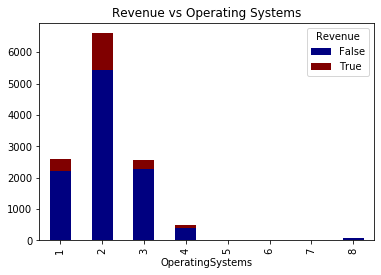

In [28]:
ct=pd.crosstab(df['OperatingSystems'],df['Revenue'])
ct.plot(kind='bar',stacked=True,colormap='jet')
plt.title('Revenue vs Operating Systems');

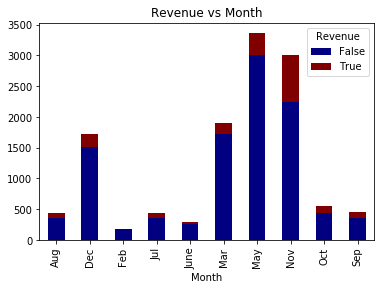

In [29]:
ct=pd.crosstab(df['Month'],df['Revenue'])
ct.plot(kind='bar',stacked=True,colormap='jet')
plt.title('Revenue vs Month');

Even though more people are visiting website in May, highest transaction rate is in November

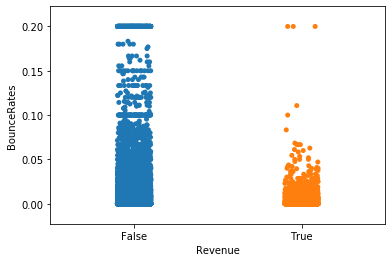

In [30]:
sns.stripplot(df['Revenue'],df['BounceRates'])
plt.show()

Bounce rate is low for success transaction

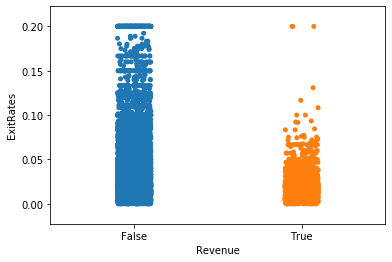

In [31]:
sns.stripplot(df['Revenue'],df['ExitRates'])
plt.show()

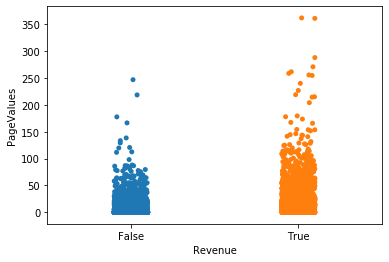

In [32]:
sns.stripplot(df['Revenue'],df['PageValues'])
plt.show()

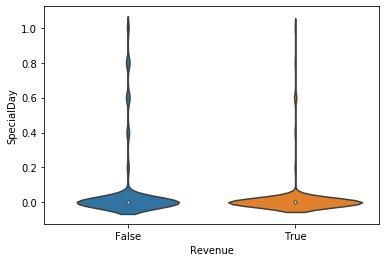

In [33]:
sns.violinplot(df['Revenue'],df['SpecialDay'])
plt.show()

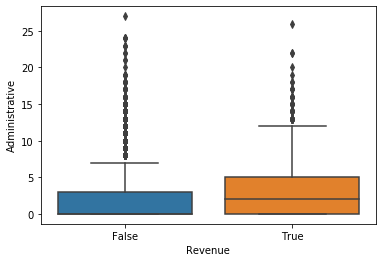

In [34]:
sns.boxplot(df['Revenue'],df['Administrative'])
plt.show()

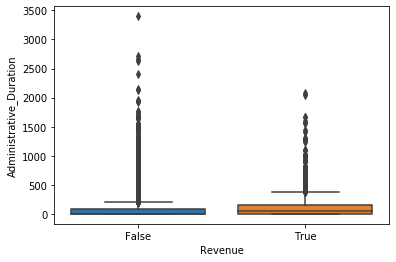

In [35]:
sns.boxplot(df['Revenue'],df['Administrative_Duration'])
plt.show()

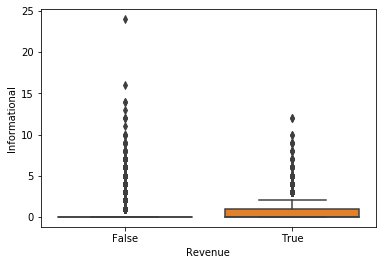

In [36]:
sns.boxplot(df['Revenue'],df['Informational'])
plt.show()

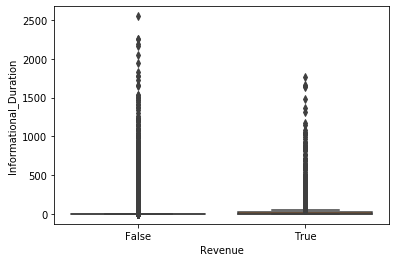

In [37]:
sns.boxplot(df['Revenue'],df['Informational_Duration'])
plt.show()

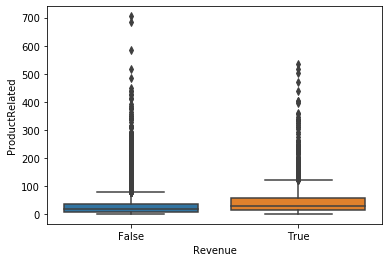

In [38]:
sns.boxplot(df['Revenue'],df['ProductRelated'])
plt.show()

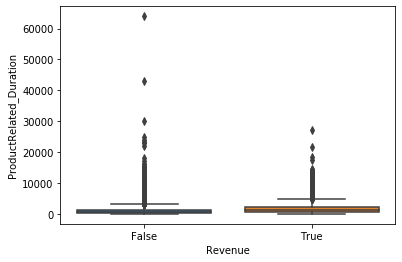

In [39]:
sns.boxplot(df['Revenue'],df['ProductRelated_Duration'])
plt.show()

From the above plots, it is difficult to find whether these variables are significant or not. So we have to do statistical test for that.

## Categorical Features Encoding

In [40]:
df1 = df.copy()

In [41]:
df['Revenue'] = df['Revenue'].astype('int64')
df['Weekend'] = df['Weekend'].astype('int64')

In [42]:
df = pd.get_dummies(df,drop_first=True)

In [43]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

## Base Model

In [45]:
y = df['Revenue']
X = df.drop(['Revenue'],axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [47]:
models = {'Decision Tree':DecisionTreeClassifier(random_state=42),
        'Random Forest':RandomForestClassifier(n_estimators=50,random_state=42),
        'K Nearest Neighbors':KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes':GaussianNB()
        }

In [48]:
for name, algo in models.items():
    model = algo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Train Score :',model.score(X_train, y_train)*100)
    print('Test Score :',accuracy_score(y_test, y_pred)*100)
    print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
    print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
    print('F1 Score :',f1_score(y_test,y_pred)*100)
    print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n')

Decision Tree
Train Score : 100.0
Test Score : 86.11741809925397
Precision : 86.11741809925397
Recall : 86.11741809925397
F1 Score : 56.68016194331984
AUC Score : 74.40857697407736
Confusion matrix: 
[[2375  219]
 [ 209  280]]


Random Forest
Train Score : 99.97837136368551
Test Score : 89.5231916963996
Precision : 89.5231916963996
Recall : 89.5231916963996
F1 Score : 62.745098039215684
AUC Score : 75.76868437940001
Confusion matrix: 
[[2488  106]
 [ 217  272]]


K Nearest Neighbors
Train Score : 89.72639775062183
Test Score : 85.27408368472267
Precision : 85.27408368472267
Recall : 85.27408368472267
F1 Score : 36.235955056179776
AUC Score : 61.37831049472355
Confusion matrix: 
[[2500   94]
 [ 360  129]]


Naive Bayes
Train Score : 80.5991132259111
Test Score : 79.79240999026922
Precision : 79.79240999026922
Recall : 79.79240999026922
F1 Score : 49.225753871230644
AUC Score : 72.47533635115173
Confusion matrix: 
[[2158  436]
 [ 187  302]]




As the dataset is highly imbalanced, there is high train and test score. But AUC scores are less.

## Imbalanced Dataset

Balanced dataset can be created by using SMOTE technique or any other resampling techniques.We will apply resampling techniques to the training dataset and keep the validation set as such.

In [49]:
y=df['Revenue']
X=df.drop(['Revenue'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
sm=SMOTE(random_state=42, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

C:\Users\Prinu Elsa Roy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [51]:
for name, algo in models.items():
    model = algo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Train Score :',model.score(X_train, y_train)*100)
    print('Test Score :',accuracy_score(y_test, y_pred)*100)
    print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
    print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
    print('F1 Score :',f1_score(y_test,y_pred)*100)
    print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n')

Decision Tree
Train Score : 100.0
Test Score : 85.56600713590659
Precision : 85.56600713590659
Recall : 85.56600713590659
F1 Score : 55.80933465739821
AUC Score : 74.16387195242126
Confusion matrix: 
[[2357  237]
 [ 208  281]]


Random Forest
Train Score : 99.99361267245784
Test Score : 89.29614012325658
Precision : 89.29614012325658
Recall : 89.29614012325658
F1 Score : 65.83850931677017
AUC Score : 79.45057258136994
Confusion matrix: 
[[2435  159]
 [ 171  318]]


K Nearest Neighbors
Train Score : 91.2621359223301
Test Score : 75.67304573467402
Precision : 75.67304573467402
Recall : 75.67304573467402
F1 Score : 43.353474320241695
AUC Score : 68.78276595509851
Confusion matrix: 
[[2046  548]
 [ 202  287]]


Naive Bayes
Train Score : 76.29024016351559
Test Score : 67.46675316250406
Precision : 67.46675316250406
Recall : 67.46675316250406
F1 Score : 44.12256267409471
AUC Score : 72.95031951979793
Confusion matrix: 
[[1684  910]
 [  93  396]]




## Standard Scaling-Modelling

In [52]:
y=df['Revenue']
X=df.drop(['Revenue'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

sm=SMOTE(random_state=42, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

C:\Users\Prinu Elsa Roy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [54]:
for name, algo in models.items():
    model = algo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Train Score :',model.score(X_train, y_train)*100)
    print('Test Score :',accuracy_score(y_test, y_pred)*100)
    print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
    print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
    print('F1 Score :',f1_score(y_test,y_pred)*100)
    print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n')

Decision Tree
Train Score : 100.0
Test Score : 85.07946805060006
Precision : 85.07946805060006
Recall : 85.07946805060006
F1 Score : 55.938697318007655
AUC Score : 74.7874598136647
Confusion matrix: 
[[2331  263]
 [ 197  292]]


Random Forest
Train Score : 99.99361267245784
Test Score : 89.10152448913396
Precision : 89.10152448913396
Recall : 89.10152448913396
F1 Score : 67.50483558994198
AUC Score : 81.90712246130364
Confusion matrix: 
[[2398  196]
 [ 140  349]]


K Nearest Neighbors
Train Score : 92.23939703628002
Test Score : 78.30035679532924
Precision : 78.30035679532924
Recall : 78.30035679532924
F1 Score : 49.356548069644205
AUC Score : 73.58005654073503
Confusion matrix: 
[[2088  506]
 [ 163  326]]


Naive Bayes
Train Score : 67.00306591722024
Test Score : 48.880960103795005
Precision : 48.880960103795005
Recall : 48.880960103795005
F1 Score : 35.51554828150573
AUC Score : 65.05862198907973
Confusion matrix: 
[[1073 1521]
 [  55  434]]




## Feature Selection

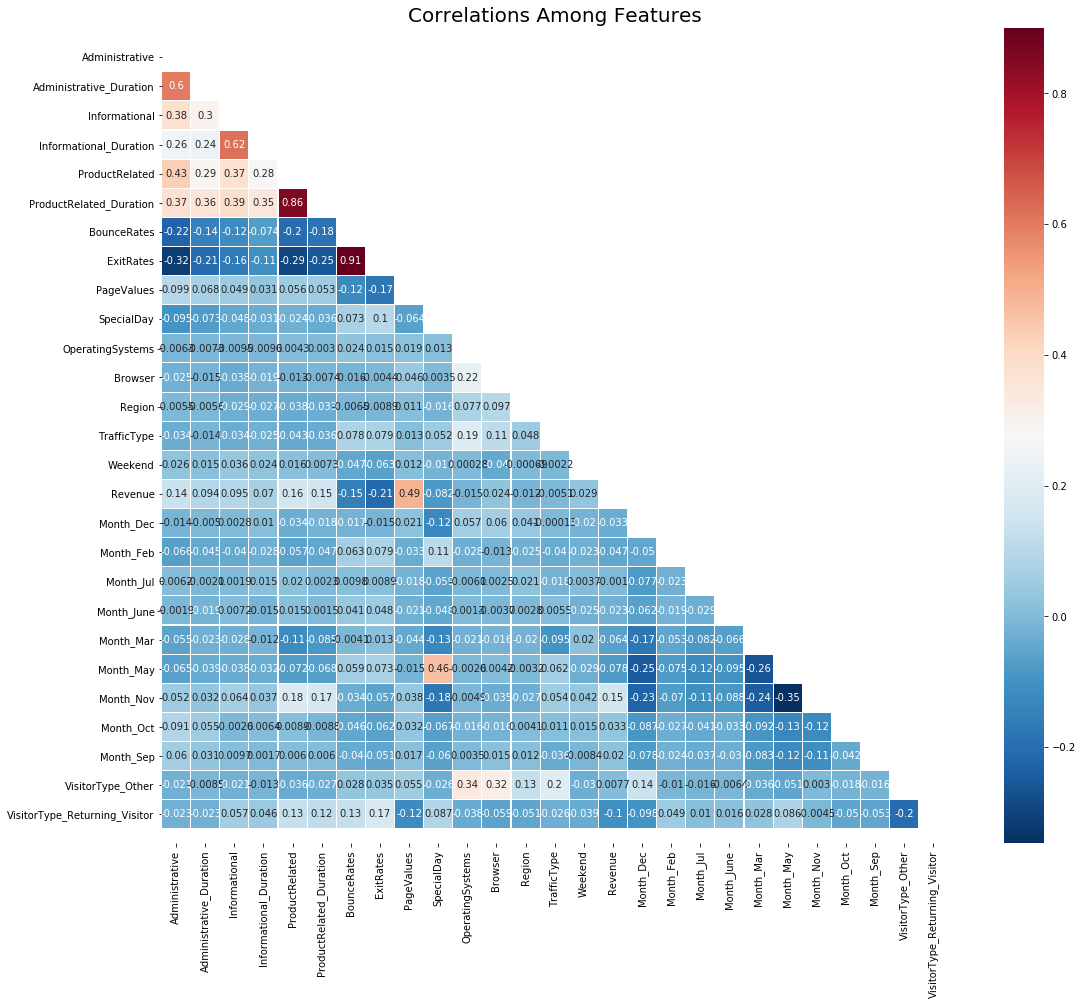

In [55]:
# Filter based Method : Multi-collinearity
mask = np.zeros_like(df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig,ax= plt.subplots()
fig.set_size_inches(20,15)
sns.heatmap(df.corr(),
           annot=True,
           mask = mask,
           cmap = 'RdBu_r',
           linewidths=0.1,
           linecolor='white',
           vmax = .9,
           square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

Revenue is not having much collinearity with any of the features. Only Page Values is having a correlation of 0.49.
But as expected administrative and administrative duration,imformational and informational_duration,product realted and product_related duration is having multi-collinearity. Also bounce rates and exit rates is also having a multicollinearity

We will also check the statistical significance of the features

In [56]:
ct=pd.crosstab(df1['Revenue'],df1['Month'])
chi_value,p_value,dof,ec=chi2_contingency(ct)
print('p-value of Month :',p_value)

p-value of Month : 2.2387855164805443e-77


In [57]:
ct=pd.crosstab(df1['Revenue'],df1['OperatingSystems'])
chi_value,p_value,dof,ec=chi2_contingency(ct)
print('p-value of Month :',p_value)

p-value of Month : 1.4160941129614507e-13


In [58]:
ct=pd.crosstab(df1['Revenue'],df1['Browser'])
chi_value,p_value,dof,ec=chi2_contingency(ct)
print('p-value of Month :',p_value)

p-value of Month : 0.00608754317955108


In [59]:
ct=pd.crosstab(df1['Revenue'],df1['Region'])
chi_value,p_value,dof,ec=chi2_contingency(ct)
print('p-value of Month :',p_value)

p-value of Month : 0.3214249979076556


In [60]:
ct=pd.crosstab(df1['Revenue'],df1['TrafficType'])
chi_value,p_value,dof,ec=chi2_contingency(ct)
print('p-value of Month :',p_value)

p-value of Month : 1.652735258160153e-67


In [61]:
ct=pd.crosstab(df1['Revenue'],df1['Weekend'])
print(ct)

Weekend  False  True 
Revenue              
False     8053   2369
True      1409    499


In [62]:
count=np.array([1409,499])
obs=np.array([9462,2868])
zstat,p_value=proportions_ztest(count,obs) 
print('p-value of Weekend :',p_value)

p-value of Weekend : 0.0011420423637110938


Here we assign the confidence level as 95% and found the feature 'region' as insignificant.

In [63]:
new_data=df1.groupby('Revenue')
new_data_rev=new_data.get_group(1)
new_data_no_rev=new_data.get_group(0)

In [64]:
tstat,p_value=ttest_ind(new_data_rev['Administrative'],new_data_no_rev['Administrative'])
print('p-value of Administartive :',p_value)

p-value of Administartive : 3.5197598377784024e-54


In [65]:
tstat,p_value=ttest_ind(new_data_rev['Administrative_Duration'],new_data_no_rev['Administrative_Duration'])
print('p-value of Administartive_Duration :',p_value)

p-value of Administartive_Duration : 2.146513634744256e-25


In [66]:
tstat,p_value=ttest_ind(new_data_rev['Informational'],new_data_no_rev['Informational'])
print('p-value of Informational :',p_value)

p-value of Informational : 3.174034311262581e-26


In [67]:
tstat,p_value=ttest_ind(new_data_rev['Informational_Duration'],new_data_no_rev['Informational_Duration'])
print('p-value of Informational_Duration :',p_value)

p-value of Informational_Duration : 5.282870860721331e-15


In [68]:
tstat,p_value=ttest_ind(new_data_rev['ProductRelated'],new_data_no_rev['ProductRelated'])
print('p-value of ProductRelated :',p_value)

p-value of ProductRelated : 3.2411873289224e-70


In [69]:
tstat,p_value=ttest_ind(new_data_rev['ProductRelated_Duration'],new_data_no_rev['ProductRelated_Duration'])
print('p-value of Informational_Duration :',p_value)

p-value of Informational_Duration : 6.115338253467455e-65


In [70]:
tstat,p_value=ttest_ind(new_data_rev['BounceRates'],new_data_no_rev['BounceRates'])
print('p-value of BounceRates :',p_value)

p-value of BounceRates : 1.594197538516729e-63


In [71]:
tstat,p_value=ttest_ind(new_data_rev['ExitRates'],new_data_no_rev['ExitRates'])
print('p-value of ExitRates :',p_value)

p-value of ExitRates : 1.6626536250736147e-119


In [72]:
tstat,p_value=ttest_ind(new_data_rev['PageValues'],new_data_no_rev['PageValues'])
print('p-value of PageValues :',p_value)

p-value of PageValues : 0.0


In [73]:
tstat,p_value=ttest_ind(new_data_rev['SpecialDay'],new_data_no_rev['SpecialDay'])
print('p-value of SpecialDay :',p_value)

p-value of SpecialDay : 5.498934260229595e-20


So all numerical features are significant

## Modelling after Feature Selection

In [74]:
y=df['Revenue']
X=df.drop(['Revenue','Region','Administrative','Informational','ProductRelated','BounceRates'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [75]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

sm=SMOTE(random_state=42, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

C:\Users\Prinu Elsa Roy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [76]:
for name, algo in models.items():
    model = algo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Train Score :',model.score(X_train, y_train)*100)
    print('Test Score :',accuracy_score(y_test, y_pred)*100)
    print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
    print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
    print('F1 Score :',f1_score(y_test,y_pred)*100)
    print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n')

Decision Tree
Train Score : 100.0
Test Score : 84.2685695750892
Precision : 84.2685695750892
Recall : 84.2685695750892
F1 Score : 56.96539485359361
AUC Score : 76.71183145626293
Confusion matrix: 
[[2277  317]
 [ 168  321]]


Random Forest
Train Score : 99.98722534491569
Test Score : 88.35549789166396
Precision : 88.35549789166396
Recall : 88.35549789166396
F1 Score : 67.21461187214612
AUC Score : 83.04030222331542
Confusion matrix: 
[[2356  238]
 [ 121  368]]


K Nearest Neighbors
Train Score : 92.91006642820643
Test Score : 80.66818034382095
Precision : 80.66818034382095
Recall : 80.66818034382095
F1 Score : 52.09003215434084
AUC Score : 74.82120135659923
Confusion matrix: 
[[2163  431]
 [ 165  324]]


Naive Bayes
Train Score : 69.4685743484926
Test Score : 53.097632176451505
Precision : 53.097632176451505
Recall : 53.097632176451505
F1 Score : 37.51080380293863
AUC Score : 67.5644045642532
Confusion matrix: 
[[1203 1391]
 [  55  434]]




## Hyper Parameter Tuning

In [77]:
# param-grid

# dt-grid
dt_grid = {'criterion':['gini','entropy'],
           'max_features':['auto','sqrt','log2'],
           'splitter':['best','random'],
           'max_depth':[5,10,15]}

# rf grid
rf_grid = {'criterion':['gini','entropy'],
           'n_estimators':np.arange(10, 500, 50),
           'max_features':['auto','sqrt','log2'],
           'max_depth':[None,5,8,10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

# KNN Grid
knn_grid = {'n_neighbors':np.arange(1,21)}

## Randomized Search CV

In [78]:
# Randomized Search CV-DT
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                   param_distributions=dt_grid,
                   cv=5,
                   n_iter=20,
                   verbose=2)

# Fitting model
rs_dt.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] splitter=random, max_features=auto, max_depth=5, criterion=entropy 
[CV]  splitter=random, max_features=auto, max_depth=5, criterion=entropy, total=   0.0s
[CV] splitter=random, max_features=auto, max_depth=5, criterion=entropy 
[CV]  splitter=random, max_features=auto, max_depth=5, criterion=entropy, total=   0.0s
[CV] splitter=random, max_features=auto, max_depth=5, criterion=entropy 
[CV]  splitter=random, max_features=auto, max_depth=5, criterion=entropy, total=   0.0s
[CV] splitter=random, max_features=auto, max_depth=5, criterion=entropy 
[CV]  splitter=random, max_features=auto, max_depth=5, criterion=entropy, total=   0.0s
[CV] splitter=random, max_features=auto, max_depth=5, criterion=entropy 
[CV]  splitter=random, max_features=auto, max_depth=5, criterion=entropy, total=   0.0s
[CV] splitter=random, max_features=sqrt, max_depth=10, criterion=gini 
[CV]  splitter=random, max_features=sqrt, max_depth=10, criter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  splitter=best, max_features=auto, max_depth=15, criterion=entropy, total=   0.1s
[CV] splitter=best, max_features=auto, max_depth=15, criterion=entropy 
[CV]  splitter=best, max_features=auto, max_depth=15, criterion=entropy, total=   0.1s
[CV] splitter=best, max_features=auto, max_depth=15, criterion=entropy 
[CV]  splitter=best, max_features=auto, max_depth=15, criterion=entropy, total=   0.0s
[CV] splitter=best, max_features=auto, max_depth=15, criterion=entropy 
[CV]  splitter=best, max_features=auto, max_depth=15, criterion=entropy, total=   0.0s
[CV] splitter=best, max_features=auto, max_depth=15, criterion=entropy 
[CV]  splitter=best, max_features=auto, max_depth=15, criterion=entropy, total=   0.1s
[CV] splitter=random, max_features=log2, max_depth=15, criterion=gini 
[CV]  splitter=random, max_features=log2, max_depth=15, criterion=gini, total=   0.0s
[CV] splitter=random, max_features=log2, max_depth=15, criterion=gini 
[CV]  splitter=random, max_features=log2, max_dep

[CV]  splitter=best, max_features=sqrt, max_depth=10, criterion=gini, total=   0.0s
[CV] splitter=best, max_features=auto, max_depth=10, criterion=gini ..
[CV]  splitter=best, max_features=auto, max_depth=10, criterion=gini, total=   0.0s
[CV] splitter=best, max_features=auto, max_depth=10, criterion=gini ..
[CV]  splitter=best, max_features=auto, max_depth=10, criterion=gini, total=   0.0s
[CV] splitter=best, max_features=auto, max_depth=10, criterion=gini ..
[CV]  splitter=best, max_features=auto, max_depth=10, criterion=gini, total=   0.0s
[CV] splitter=best, max_features=auto, max_depth=10, criterion=gini ..
[CV]  splitter=best, max_features=auto, max_depth=10, criterion=gini, total=   0.0s
[CV] splitter=best, max_features=auto, max_depth=10, criterion=gini ..
[CV]  splitter=best, max_features=auto, max_depth=10, criterion=gini, total=   0.0s
[CV] splitter=best, max_features=sqrt, max_depth=15, criterion=gini ..
[CV]  splitter=best, max_features=sqrt, max_depth=15, criterion=gini, 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished


In [79]:
rs_dt.best_params_

{'splitter': 'best',
 'max_features': 'log2',
 'max_depth': 15,
 'criterion': 'gini'}

In [80]:
y_pred = rs_dt.predict(X_test)

In [81]:
print('Randomized Search CV Decision Tree')
print(f'Train Score :{rs_dt.score(X_train,y_train)*100:.2f}%')
print(f'Test Score :{rs_dt.score(X_test,y_test)*100:.2f}%')
print(f'AUC Score :{roc_auc_score(y_test,y_pred)*100:.2f}%')

Randomized Search CV Decision Tree
Train Score :95.16%
Test Score :84.04%
AUC Score :76.58%


In [82]:
# Randomized Search CV-RF
rs_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                   param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                   verbose=2)

# Fitting model
rs_rf.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=160, min_samples_split=10, min_samples_leaf=15, max_features=sqrt, max_depth=10, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=160, min_samples_split=10, min_samples_leaf=15, max_features=sqrt, max_depth=10, criterion=entropy, total=   4.6s
[CV] n_estimators=160, min_samples_split=10, min_samples_leaf=15, max_features=sqrt, max_depth=10, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV]  n_estimators=160, min_samples_split=10, min_samples_leaf=15, max_features=sqrt, max_depth=10, criterion=entropy, total=   4.5s
[CV] n_estimators=160, min_samples_split=10, min_samples_leaf=15, max_features=sqrt, max_depth=10, criterion=entropy 
[CV]  n_estimators=160, min_samples_split=10, min_samples_leaf=15, max_features=sqrt, max_depth=10, criterion=entropy, total=   4.6s
[CV] n_estimators=160, min_samples_split=10, min_samples_leaf=15, max_features=sqrt, max_depth=10, criterion=entropy 
[CV]  n_estimators=160, min_samples_split=10, min_samples_leaf=15, max_features=sqrt, max_depth=10, criterion=entropy, total=   4.5s
[CV] n_estimators=160, min_samples_split=10, min_samples_leaf=15, max_features=sqrt, max_depth=10, criterion=entropy 
[CV]  n_estimators=160, min_samples_split=10, min_samples_leaf=15, max_features=sqrt, max_depth=10, criterion=entropy, total=   4.5s
[CV] n_estimators=310, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=8, criterion=entropy 

[CV]  n_estimators=60, min_samples_split=18, min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini, total=   1.6s
[CV] n_estimators=60, min_samples_split=18, min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini 
[CV]  n_estimators=60, min_samples_split=18, min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini, total=   1.6s
[CV] n_estimators=60, min_samples_split=18, min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini 
[CV]  n_estimators=60, min_samples_split=18, min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini, total=   1.6s
[CV] n_estimators=60, min_samples_split=18, min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini 
[CV]  n_estimators=60, min_samples_split=18, min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini, total=   1.6s
[CV] n_estimators=60, min_samples_split=18, min_samples_leaf=5, max_features=auto, max_depth=None, criterion=gini 
[CV]  n_estimators=6

[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=11, max_features=sqrt, max_depth=5, criterion=entropy, total=   2.1s
[CV] n_estimators=360, min_samples_split=10, min_samples_leaf=19, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=360, min_samples_split=10, min_samples_leaf=19, max_features=log2, max_depth=10, criterion=gini, total=   7.9s
[CV] n_estimators=360, min_samples_split=10, min_samples_leaf=19, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=360, min_samples_split=10, min_samples_leaf=19, max_features=log2, max_depth=10, criterion=gini, total=   7.7s
[CV] n_estimators=360, min_samples_split=10, min_samples_leaf=19, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=360, min_samples_split=10, min_samples_leaf=19, max_features=log2, max_depth=10, criterion=gini, total=   7.7s
[CV] n_estimators=360, min_samples_split=10, min_samples_leaf=19, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.7min finished


In [83]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 18,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'gini'}

In [84]:
y_pred = rs_rf.predict(X_test)

In [85]:
print('Randomized Search CV Random Forest')
print(f'Train Score :{rs_rf.score(X_train,y_train)*100:.2f}%')
print(f'Test Score :{rs_rf.score(X_test,y_test)*100:.2f}%')
print(f'AUC Score :{roc_auc_score(y_test,y_pred)*100:.2f}%')

Randomized Search CV Random Forest
Train Score :93.62%
Test Score :87.87%
AUC Score :84.74%


In [86]:
# Randomized Search CV-KNN
rs_knn = RandomizedSearchCV(KNeighborsClassifier(),
                   param_distributions=knn_grid,
                   cv=5,
                   n_iter=20,
                   verbose=2)

# Fitting model
rs_knn.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=   1.1s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   1.2s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.1s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.2s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.2s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   1.3s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   1.3s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   1.3s
[CV] n_neighbors=2 ...................................................
[CV] .

[CV] ................................... n_neighbors=12, total=   2.1s
[CV] n_neighbors=13 ..................................................
[CV] ................................... n_neighbors=13, total=   2.2s
[CV] n_neighbors=13 ..................................................
[CV] ................................... n_neighbors=13, total=   2.1s
[CV] n_neighbors=13 ..................................................
[CV] ................................... n_neighbors=13, total=   2.1s
[CV] n_neighbors=13 ..................................................
[CV] ................................... n_neighbors=13, total=   2.1s
[CV] n_neighbors=13 ..................................................
[CV] ................................... n_neighbors=13, total=   1.9s
[CV] n_neighbors=14 ..................................................
[CV] ................................... n_neighbors=14, total=   2.2s
[CV] n_neighbors=14 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.2min finished


In [87]:
rs_knn.best_params_

{'n_neighbors': 1}

In [88]:
y_pred = rs_knn.predict(X_test)

In [89]:
print('Randomized Search CV KNN')
print(f'Train Score :{rs_knn.score(X_train,y_train)*100:.2f}%')
print(f'Test Score :{rs_knn.score(X_test,y_test)*100:.2f}%')
print(f'AUC Score :{roc_auc_score(y_test,y_pred)*100:.2f}%')

Randomized Search CV KNN
Train Score :100.00%
Test Score :83.68%
AUC Score :71.47%


Choosing best model parameters from Randomized Search CV:Random Forest

## Boosting

In [105]:
model = AdaBoostClassifier(
    RandomForestClassifier(n_estimators=60,
                           min_samples_split=18,
                           min_samples_leaf=5,
                           max_features='auto',
                           max_depth=None,
                           criterion='gini',
                           random_state=42),
    n_estimators=200
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [106]:
print('Train Score :',model.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 100.0
Test Score : 88.77716509892961
Precision : 88.77716509892961
Recall : 88.77716509892961
F1 Score : 66.40776699029126
AUC Score : 81.133550288301
Confusion matrix:  [[2395  199]
 [ 147  342]]


Choosing best model as randomized search cv based random forest

## Evaluation

In [107]:
y_pred = rs_rf.predict(X_test)

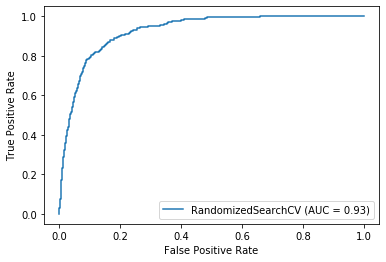

In [108]:
plot_roc_curve(rs_rf,X_test,y_test);

In [109]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      2594
           1       0.59      0.80      0.68       489

    accuracy                           0.88      3083
   macro avg       0.77      0.85      0.80      3083
weighted avg       0.90      0.88      0.89      3083



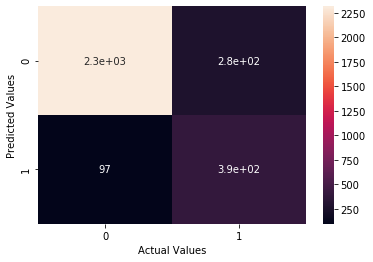

In [110]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values');

In [111]:
confusion_matrix(y_test,y_pred)

array([[2317,  277],
       [  97,  392]], dtype=int64)

In [112]:
# best params
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 18,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'gini'}

In [120]:
# New model with best params
model = RandomForestClassifier(n_estimators=60,
                               min_samples_split=18,
                               min_samples_leaf=5,
                               max_features='auto',
                               max_depth=None,
                               criterion='gini',
                               random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=18,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Feature Importance

In [122]:
feature_names = list(X.columns)

In [123]:
feature_imp = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

PageValues                       0.558462
ExitRates                        0.081036
Administrative_Duration          0.080051
ProductRelated_Duration          0.073751
TrafficType                      0.041997
Month_Nov                        0.036341
Informational_Duration           0.032711
OperatingSystems                 0.026680
Browser                          0.019131
VisitorType_Returning_Visitor    0.012850
Month_May                        0.008481
Month_Mar                        0.005084
Weekend                          0.004943
SpecialDay                       0.004783
Month_Sep                        0.004187
Month_Dec                        0.003356
Month_Oct                        0.003058
Month_Jul                        0.002189
Month_June                       0.000431
Month_Feb                        0.000302
VisitorType_Other                0.000175
dtype: float64

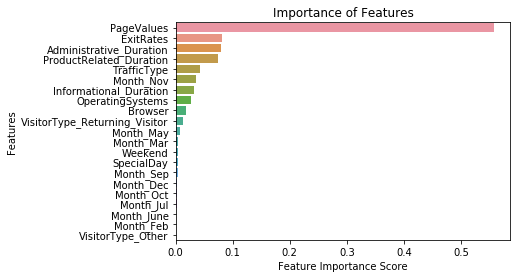

In [124]:
sns.barplot(feature_imp,feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Importance of Features')
plt.show()

The success of transaction depends mainly on page values,exit rate and the duration spent in different pages